In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras import models, layers

In [15]:
Image_Size=256
Batch_Size=32

In [19]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PatatoLeafDataSet",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 2153 files belonging to 3 classes.


In [24]:
className=dataset.class_names
className

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

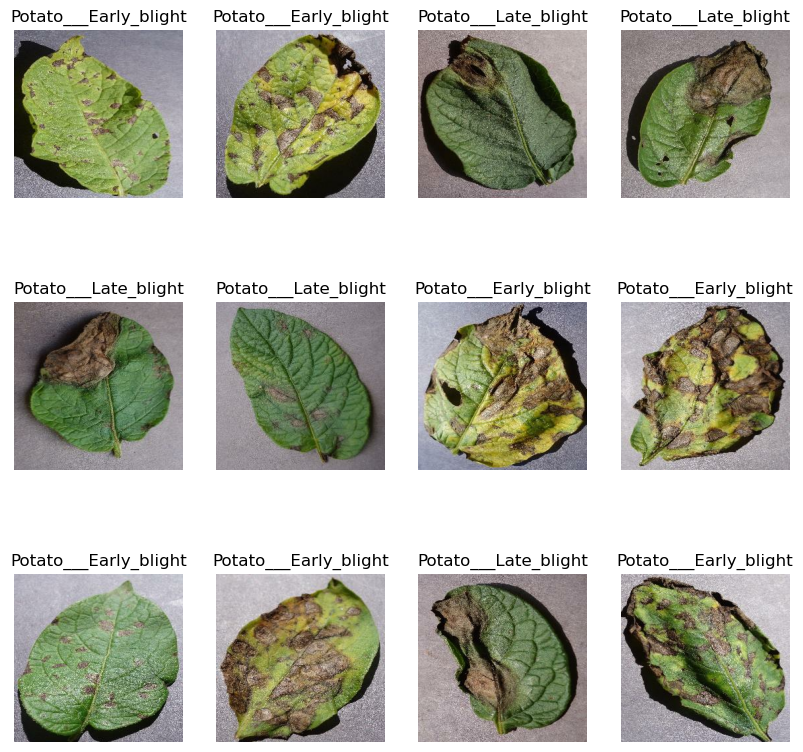

In [47]:
plt.figure(figsize=(10,10))
for batch_Image,batch_lable in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(className[batch_lable[i]])
        plt.imshow(batch_Image[i].numpy().astype("uint8"))
        plt.axis("off")

In [63]:
# calculate Training 80% , Testing 10%  , Validation 10%

In [64]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [65]:
train_ds=dataset.take(54)
len(train_ds)

54

In [66]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [67]:
valide_size=0.1
len(dataset)*valide_size


6.800000000000001

In [68]:
valide_ds=dataset.take(6)
len(valide_ds)

6

In [69]:
test_ds=test_ds.skip(6)

In [70]:
len(test_ds)

8

In [92]:
def dataset_preprocessing(ds,train_split=0.8, valide_splite=0.1,test_splite=0.1, shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    # print(train_size)
    valide_size=int(valide_splite*ds_size)
    # print(valide_size)
    train_ds=ds.take(train_size)
    valide_ds=ds.skip(train_size).take(valide_size)
    test_ds=ds.skip(train_size).skip(valide_size)
    return train_ds,valide_ds,test_ds

In [93]:
train_ds,valide_ds,test_ds=dataset_preprocessing(dataset)

In [94]:
print(len(train_ds))
print(len(valide_ds))
len(test_ds)

54
6


8

In [97]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valide_ds=valide_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)